In [1]:
%load_ext watermark
%watermark  -d -u -a 'Sebastian Raschka' -v -p numpy,scipy,matplotlib,sklearn

Author: Sebastian Raschka

Last updated: 2021-12-10

Python implementation: CPython
Python version       : 3.9.6
IPython version      : 7.29.0

numpy     : 1.21.2
scipy     : 1.7.0
matplotlib: 3.4.3
sklearn   : 1.0



## Decision Tree Example

In [2]:
import numpy as np
from sklearn.tree import DecisionTreeClassifier

X = np.array([[1.], [2.], [3.], [4.]])
y = np.array([0, 1, 0, 1])


tree = DecisionTreeClassifier(random_state=1)
tree.fit(X, y)
tree.score(X, y)

1.0

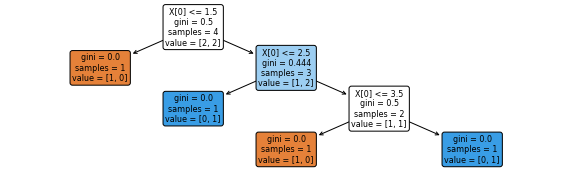

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree


plt.figure(figsize=(10, 3))

plot_tree(tree, 
          filled=True, 
          rounded=True) 

#plt.savefig('tree.pdf')
plt.show()

## Bernoulli variance

In [7]:
data_var = np.var(50*[0] + 50*[1]) # i.e., p = 0.5
data_var

0.25

In [8]:
0.5 * 0.5

0.25

## Scaling

In [12]:
np.random.seed(123)

data = np.random.random_sample(100)
np.var(data)

0.06021177568505576

In [13]:
np.var(data*10)

6.021177568505576

## VarianceThreshold

In [26]:
from sklearn.preprocessing import OneHotEncoder


X = [['blue'], ['green'], ['blue'], ['blue'], ['green'], ['red'], ['blue'], ['green']]
y = [0, 0, 1, 0, 0, 1, 0, 0]

enc = OneHotEncoder(drop='first')
enc.fit(X)
X_ohe = enc.transform(X)
X_ohe.toarray()

array([[0., 0.],
       [1., 0.],
       [0., 0.],
       [0., 0.],
       [1., 0.],
       [0., 1.],
       [0., 0.],
       [1., 0.]])

In [27]:
from sklearn.feature_selection import VarianceThreshold

sel = VarianceThreshold(threshold=(.8 * (1 - .8)))

sel.fit(X_ohe)
sel.transform(X_ohe).toarray()

array([[0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.]])